In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_est,y_test)=mnist.load_data()

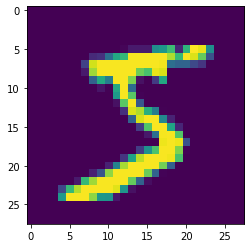

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
only_zero=X_train[y_train==0]

In [7]:
only_zero.shape

(5923, 28, 28)

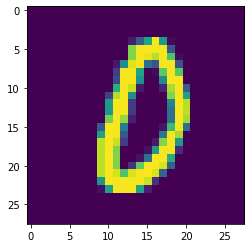

In [8]:
plt.imshow(only_zero[1101])

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [10]:
discriminator=Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))

discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [11]:
coding_size=100
generator=Sequential()
generator.add(Dense(100,activation='relu',input_shape=[coding_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [12]:
GAN=Sequential([generator,discriminator])

In [13]:
discriminator.trainable=False

In [14]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [15]:
batch_size=32

In [16]:
my_data=only_zero

In [17]:
dataset=tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [18]:
dataset=dataset.batch(batch_size,drop_remainder=True).prefetch(1)


In [27]:
epochs=1

In [21]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [25]:
x=[[0.0]]*batch_size+[[1.0]]*batch_size
len(x)

64

In [31]:
generator,discriminator=GAN.layers

for epoch in range(epochs):
    print(f'Currently{epoch+1}')
    i=0
    for X_batch in dataset:
        i=i+1
        if i%100==0:
            print(f'\t currently on batch number {i} of {len(my_data)//batch_size}')
        
        #discriminator phase
        noise=tf.random.normal(shape=[batch_size,coding_size])
        gen_image=generator(noise)
        X_fake_vs_real=tf.concat([gen_image,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
        y1=tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)
        discriminator.trainable=True
        discriminator.train_on_batch(X_fake_vs_real,y1)

        #train generator
        noise=tf.random.normal(shape=[batch_size,coding_size])
        y2=tf.constant([[1.0]]*batch_size)
        discriminator.trainable=False
        GAN.train_on_batch(noise,y2)

Currently1
	 currently on batch number 100 of 185


In [33]:
noise=tf.random.normal(shape=[10,coding_size])

In [37]:
images=generator(noise)

In [38]:
images.shape

TensorShape([10, 28, 28])

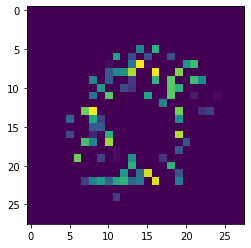

In [39]:
plt.imshow(images[0])

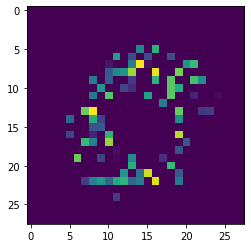

In [40]:

plt.imshow(images[1])

In [44]:
#mode collapse
(images[1]==images[0])

<tf.Tensor: shape=(28, 28), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  